In [1]:
import pandas as pd
import numpy as np

In [3]:
# Read the csv file and save it as df
df = pd.read_csv('newReview1.csv')

df

,review_id,username,merchant_id,product_id,date,rating,content
0,008b0d18-5d55-470c-9c16-5c90e726393f,i*****b,fe0e3bb0-a5f5-4529-a6d1-3a021bd9dd20,06c08160-b2f3-46a9-b4eb-a5b5ac1cad10,2023-09-02 01:13,5,Best buy ever\nit looks great works great\nthe...
1,19d64ab1-8eae-4f5a-9f0b-55564bb1906f,jessylim70,fe0e3bb0-a5f5-4529-a6d1-3a021bd9dd20,06c08160-b2f3-46a9-b4eb-a5b5ac1cad10,2023-07-21 23:33,5,Item received in good condition.\nBought durin...
2,5f14fb7b-4b24-4132-bad3-bda857da1068,s*****b,fe0e3bb0-a5f5-4529-a6d1-3a021bd9dd20,06c08160-b2f3-46a9-b4eb-a5b5ac1cad10,2023-05-08 19:37,5,Value For Money: yes\nBest Feature(s): comfort...
3,daeaba54-1760-4334-b9dc-a3e3592ea77f,a*****w,fe0e3bb0-a5f5-4529-a6d1-3a021bd9dd20,06c08160-b2f3-46a9-b4eb-a5b5ac1cad10,2023-06-13 11:03,5,Impressed with the quality and looks really ni...
4,b58e603c-6abd-4020-b7dd-b20770e2cf61,j*****n,fe0e3bb0-a5f5-4529-a6d1-3a021bd9dd20,06c08160-b2f3-46a9-b4eb-a5b5ac1cad10,2023-10-06 12:56,5,Value For Money: yes\nBest Feature(s): the wei...
...,...,...,...,...,...,...,...
2485,2c82fcfc-48d8-4e36-8c8f-3ee417041835,t*****g,476ce4cf-bb29-4999-a042-43116d3a58cc,095d94aa-2759-469f-bded-6a824867d5e0,2021-09-25 21:02,5,NaN
2486,1b66ba3b-ec46-4411-83f0-ee3171446ae0,aresxmarc,476ce4cf-bb29-4999-a042-43116d3a58cc,095d94aa-2759-469f-bded-6a824867d5e0,2021-08-19 10:28,5,NaN
2487,6fed0fde-874d-488a-b194-e399873b0445,clement4461,476ce4cf-bb29-4999-a042-43116d3a58cc,095d94aa-2759-469f-bded-6a824867d5e0,2021-10-23 17:59,5,NaN
2488,ada30d67-74ff-416e-bb95-26c93463daaa,garethcjl90,476ce4cf-bb29-4999-a042-43116d3a58cc,095d94aa-2759-469f-bded-6a824867d5e0,2021-12-10 14:15,5,NaN


In [4]:
# Get the no. of products scraped
print("Number of products: {}".format(df["product_id"].nunique()))

Number of products: 7


# 1. User table

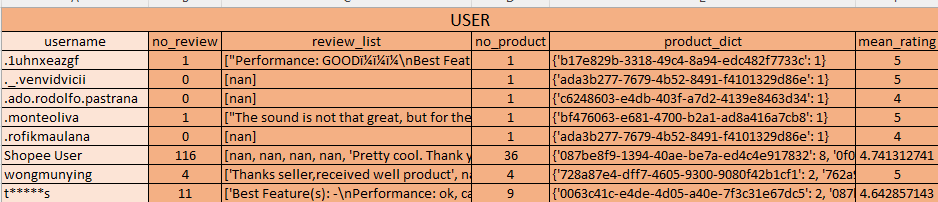

## 1.1 Count number of review

In [5]:
# Count number of review for each user
count_no_review_df = df.groupby('username')['review_id'].nunique().reset_index(name='no_review')

count_no_review_df

,username,no_review
0,0*****r,1
1,000ztsu,1
2,0205kandar,1
3,0gpqxt95x6,1
4,0x41sn_b7h,1
...,...,...
2062,zulinafr00,1
2063,zulmizie,1
2064,zunitanezzi,1
2065,zuriahazm,1


## 1.2 Review list

In [6]:
# Group/Match the username with their contents and save it into a list
user_contents = df.groupby('username')['content'].agg(list).reset_index(name='review_list')

# Create a new DataFrame to store the results
list_of_user_contents_df = pd.DataFrame({'username': user_contents['username'],
                          'review_list': user_contents['review_list']})

list_of_user_contents_df

,username,review_list
0,0*****r,[Best Feature(s): No\nValue For Money: Not at ...
1,000ztsu,[nan]
2,0205kandar,[nan]
3,0gpqxt95x6,[nan]
4,0x41sn_b7h,[Value For Money: Not at all\nPerformance: Fai...
...,...,...
2062,zulinafr00,[nan]
2063,zulmizie,[nan]
2064,zunitanezzi,[nan]
2065,zuriahazm,"[Tq seller, the sound is beautiful👍👍👍👍👍]"


## 1.3 Count number of products each user commented

In [7]:
# Count number of products each user reviewed on
no_of_products_df = df.groupby('username')['product_id'].nunique().reset_index(name='no_product')

# Remove duplicate rows based on both 'username' and 'product_id'
no_of_products_df = no_of_products_df.drop_duplicates(subset=['username', 'no_product'])

no_of_products_df

,username,no_product
0,0*****r,1
1,000ztsu,1
2,0205kandar,1
3,0gpqxt95x6,1
4,0x41sn_b7h,1
...,...,...
2062,zulinafr00,1
2063,zulmizie,1
2064,zunitanezzi,1
2065,zuriahazm,1


## 1.4 Dictionary of products commented

In [8]:
# Group by 'username' and 'Product ID' and count the number of comments
content_counts = df.groupby(['username', 'product_id']).size().reset_index(name='content_count')

# Create a nested dictionary
result_dict = {}

for _, row in content_counts.iterrows():
    username = row['username']
    productid = row['product_id']
    count = row['content_count']

    if username not in result_dict:
        result_dict[username] = {}

    result_dict[username][productid] = count

# Convert the dictionary into a DataFrame
user_product_counted_contents_df = pd.DataFrame(list(result_dict.items()), columns=['username', 'product_dict'])

# Display the result
user_product_counted_contents_df


,username,product_dict
0,0*****r,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1}
1,000ztsu,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1}
2,0205kandar,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1}
3,0gpqxt95x6,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1}
4,0x41sn_b7h,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1}
...,...,...
2062,zulinafr00,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1}
2063,zulmizie,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1}
2064,zunitanezzi,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1}
2065,zuriahazm,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1}


## 1.5 Mean Ratings for each user

In [10]:
user_ratings_df = df.groupby('username')['rating'].mean().reset_index(name='mean_rating')

user_ratings_df

,username,mean_rating
0,0*****r,1.0
1,000ztsu,5.0
2,0205kandar,5.0
3,0gpqxt95x6,4.0
4,0x41sn_b7h,1.0
...,...,...
2062,zulinafr00,5.0
2063,zulmizie,5.0
2064,zunitanezzi,4.0
2065,zuriahazm,5.0


## 1.6 Group all dataframes into 1 and save into .csv

In [11]:
concatenated_df = pd.concat([count_no_review_df,
                             list_of_user_contents_df, 
                             no_of_products_df, 
                             user_product_counted_contents_df,
                             user_ratings_df],  axis=1)

concatenated_df = concatenated_df.iloc[:, ~concatenated_df.columns.duplicated()]

concatenated_df.to_csv("user.csv")
concatenated_df

,username,no_review,review_list,no_product,product_dict,mean_rating
0,0*****r,1,[Best Feature(s): No\nValue For Money: Not at ...,1,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1},1.0
1,000ztsu,1,[nan],1,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1},5.0
2,0205kandar,1,[nan],1,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1},5.0
3,0gpqxt95x6,1,[nan],1,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1},4.0
4,0x41sn_b7h,1,[Value For Money: Not at all\nPerformance: Fai...,1,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1},1.0
...,...,...,...,...,...,...
2062,zulinafr00,1,[nan],1,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1},5.0
2063,zulmizie,1,[nan],1,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1},5.0
2064,zunitanezzi,1,[nan],1,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1},4.0
2065,zuriahazm,1,"[Tq seller, the sound is beautiful👍👍👍👍👍]",1,{'06c08160-b2f3-46a9-b4eb-a5b5ac1cad10': 1},5.0


# References

In [ ]:
#usernameTable.iloc[1]
---
#usernameTable.['Username']
listOfUsernames=df['Username'].values
listOfComments = df['Comments'].values

#print("Value of row 1")
#display(df.iloc[1])
---
usernameTable = df.filter(['Username', 'Comments', 'Comment ID'], axis=1)
usernameTable


---
testingTable = df.filter(['Username', 'Comments', 'Comment ID'], axis=1)
testingTable = testingTable[testingTable['Username'].str.contains('\*|Shopee User') == False]

# Count number of comments for each user
count_number_of_comments = testingTable.groupby('Username')['Comment ID'].nunique().reset_index()

# Sort
sorted_counts = count_number_of_comments.sort_values(by='Comment ID', ascending=False)
top = sorted_counts.head(20)
top


---
testingTable = df.filter(['Username', 'Comments', 'Product ID'], axis=1)
testingTable = testingTable[testingTable['Username'].str.contains('\*|Shopee User') == False]

# Remove duplicate rows based on both 'userid' and 'productid'
testingTable = testingTable.drop_duplicates(subset=['Username', 'Product ID'])

# Count number of comments for each user
count_number_of_products = testingTable.groupby('Username')['Product ID'].nunique().reset_index()

# Sort
sorted_counts = count_number_of_products.sort_values(by='Product ID', ascending=False)
top = sorted_counts.head(20)
top